*Objective:* create a wordcloud

Use column names and gender, region and bmi_category data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
# load the cleaned data in to a dataframe
df = pd.read_csv('../data/insurance_cleaned.csv')
df.head()

,age,gender,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [3]:
# get the column names from the data
columns_list = df.columns.tolist()
columns_list

# get the text from specific columns
text = (
    df[['gender', 'region', 'bmi_category']]
    .astype(str)
    .values
    .flatten()
)

# join column names and text for wordcloud input
input_text = " ".join(columns_list) + " " + " ".join(text)



In [4]:
# generate wordcloud
# stopwords helps to filter out common words like 'the', 'and', etc.
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Dark2",
    collocations=False,
    stopwords=STOPWORDS,
).generate(input_text)

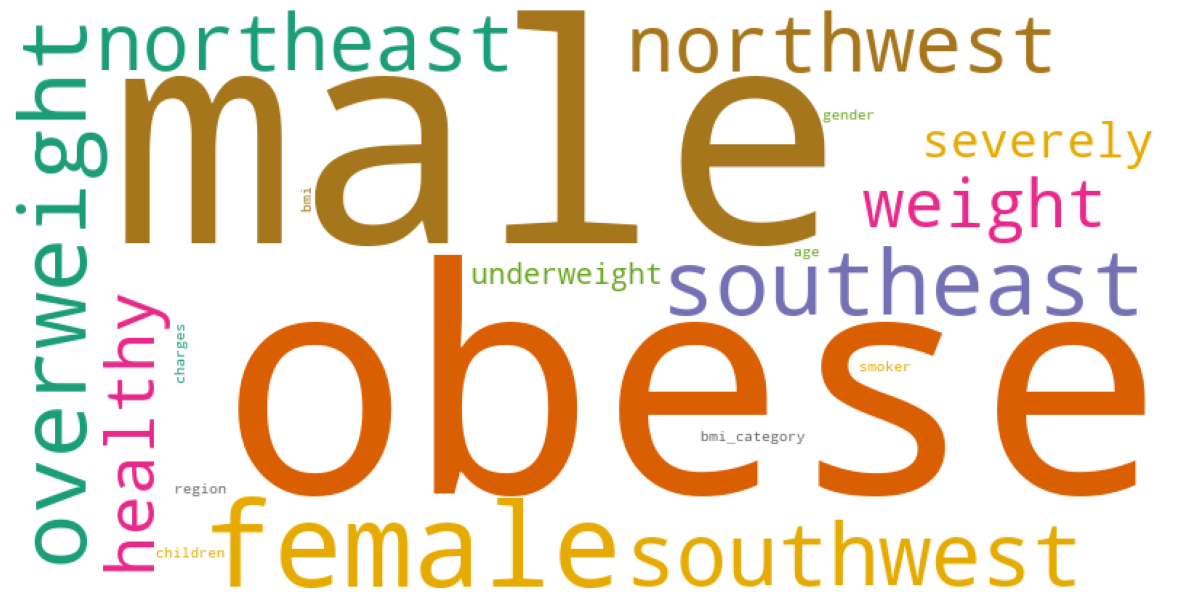

In [5]:
# display wordcloud
plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

The column names are really tiny, their frequency needs to be artificially increased as this is how a wordcloud is formed. 

In [6]:
from collections import Counter

# calculate word frequencies
word_freq = Counter(text)
word_freq

Counter({'male': 675,
         'female': 662,
         'obese': 624,
         'overweight': 377,
         'southeast': 364,
         'southwest': 325,
         'northwest': 324,
         'northeast': 324,
         'healthy weight': 222,
         'severely obese': 94,
         'underweight': 20})

In [15]:
# boost column names
for col in columns_list:
    word_freq[col] += 150   # increase this number as needed

In [16]:
# generate wordcloud with updated frequencies
wordcloud.generate_from_frequencies(word_freq)

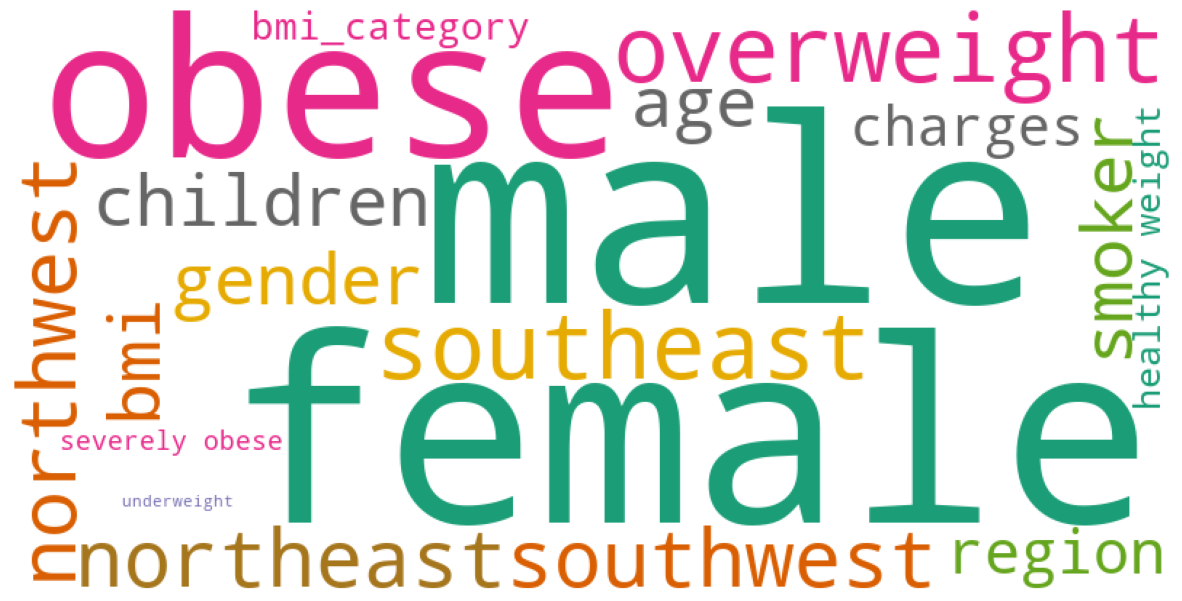

In [17]:
# display new wordcloud
plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [18]:
# save wordcloud to file
wordcloud.to_file("../images/health_wordcloud.png")  